In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enable eager execution to resolve the NotImplementedError with numpy()
tf.config.run_functions_eagerly(True)

In [2]:
IMG_SIZE=128
BATCH_SIZE=32

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/FaceRecognition',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='training'
                                                  )

Found 135 images belonging to 3 classes.


In [5]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/FaceRecognition',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='validation'
                                                  )

Found 33 images belonging to 3 classes.


In [6]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("Class indices:",class_indices)
print("class names:",class_names)


Class indices: {'Naveen': 0, 'Ragul': 1, 'Subha': 2}
class names: ['Naveen', 'Ragul', 'Subha']


In [7]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 6s/step - accuracy: 0.3609 - loss: 1.1928 - val_accuracy: 0.5152 - val_loss: 0.9720
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4783 - loss: 0.9558 - val_accuracy: 0.5152 - val_loss: 0.9498
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5079 - loss: 0.9403 - val_accuracy: 0.6364 - val_loss: 0.8848
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6625 - loss: 0.8344 - val_accuracy: 0.5758 - val_loss: 0.8513
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6445 - loss: 0.8236 - val_accuracy: 0.7576 - val_loss: 0.7026
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7307 - loss: 0.6308 - val_accuracy: 0.6970 - val_loss: 0.6941
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7277 - loss: 0.5565 - val_accuracy: 0.6667 - val_loss: 0.6565
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8444 - loss: 0.4223 - val_accuracy: 0.7273 - val_loss: 0.5511
Epoch 9/10
5/5 ━━━━━━━━━━━

In [11]:
model.save('/content/drive/MyDrive/facerec.h5')

In [12]:
from google.colab import files
files.download('/content/drive/MyDrive/facerec.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
#TEST
#Step1:Load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt#visualization
import numpy as np
model=load_model('/content/drive/MyDrive/facerec.h5')
print("Model loaded")

Model loaded


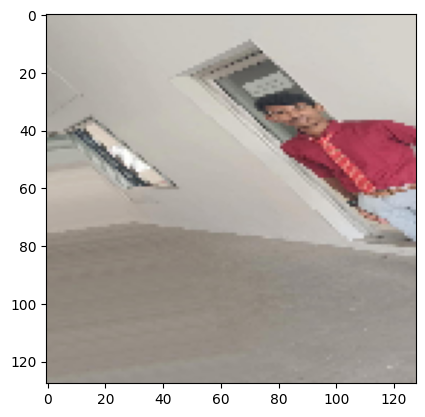

In [52]:
test_image_path="/content/drive/MyDrive/FaceRecognition/Ragul/aug_0_136.jpg"
# Load the image with the correct target_size matching the IMG_SIZE used for model training.
img=image.load_img(test_image_path,target_size=(IMG_SIZE,IMG_SIZE))
plt.imshow(img)
plt.axis()
plt.show()

In [53]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.0

In [54]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
class_names=['Naveen', 'Ragul', 'Subha']
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Ragul
